In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Drive Data Link:https://drive.google.com/drive/folders/11KxebCxKx6T3dDEtK4JBOjUt0hokQ12M?usp=drive_link

In [ ]:
i_size=224
b_size=32

In [ ]:
train=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_data=train.flow_from_directory(
    '/content/drive/MyDrive/test/train',
    target_size=(i_size,i_size),
    batch_size=b_size,
    class_mode="binary",
    subset="training"
)

Found 320 images belonging to 2 classes.


In [ ]:
validate_data=train.flow_from_directory(
    "/content/drive/MyDrive/test/test",
    target_size=(i_size,i_size),
    batch_size=b_size,
    class_mode="binary",
    subset="validation"
)

Found 63 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(i_size,i_size,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3,),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
print(train_data)
print(validate_data)

In [ ]:
model.fit(train_data,epochs=5,validation_data=validate_data,batch_size=b_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 6s/step - accuracy: 0.4573 - loss: 1.2949 - val_accuracy: 0.5238 - val_loss: 0.6910
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5431 - loss: 0.6919 - val_accuracy: 0.4762 - val_loss: 0.6951
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.5049 - loss: 0.6939 - val_accuracy: 0.5238 - val_loss: 0.6880
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.5740 - loss: 0.6793 - val_accuracy: 0.5079 - val_loss: 0.6940
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.6139 - loss: 0.6493 - val_accuracy: 0.5714 - val_loss: 0.6835


In [ ]:
model.save("/content/drive/MyDrive/model.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as m
import numpy as n
model=load_model("/content/drive/MyDrive/model.h5")
print("Model is Loaded Successfully")

Model is Loaded Successfully


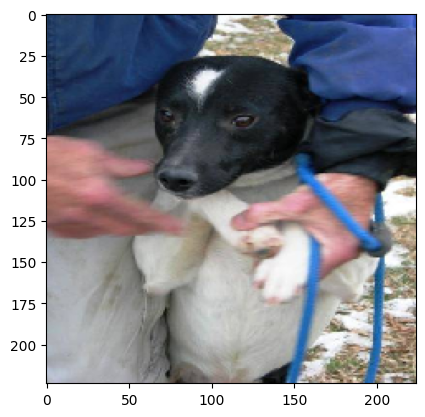

In [ ]:
path='/content/drive/MyDrive/test/test/dog/1.jpg'
img=image.load_img(path,target_size=(i_size,i_size))
m.imshow(img)
m.axis()
m.show()

In [ ]:
img_arr=image.img_to_array(img)
img_arr=n.expand_dims(img_arr,axis=0)
img_arr/=255
pred=model.predict(img_arr)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
[[0.5091352]]


In [ ]:
if pred <=0.5:
  print('It is Cat')
else:
  print('It is Dog')

It is Dog
